In [1]:
# Importing proper Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Loading the dataset
df = pd.read_csv("mallcustomers.csv")

# Preview of the dataset
print(df.head())
print(df.info())

   CustomerID  Gender  Age      Income  SpendingScore
0           1    Male   19  15,000 USD             39
1           2    Male   21  15,000 USD             81
2           3  Female   20  16,000 USD              6
3           4  Female   23  16,000 USD             77
4           5  Female   31  17,000 USD             40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    object
 4   SpendingScore  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB
None


In [3]:
# Problem 1: Converting the Income variable (string -> numeric) & Removing "," and "USD"

# Remove ',' and 'USD', strip spaces, and convert to float
df['Income'] = (df['Income'].str.replace(',', '', regex=False).str.replace('USD', '', regex=False).str.strip().astype(float))

# Check the result
print(df['Income'].head())
print(df['Income'].describe())


0    15000.0
1    15000.0
2    16000.0
3    16000.0
4    17000.0
Name: Income, dtype: float64
count       200.000000
mean      60560.000000
std       26264.721165
min       15000.000000
25%       41500.000000
50%       61500.000000
75%       78000.000000
max      137000.000000
Name: Income, dtype: float64


In [4]:
# Problem 2: Selecting features needed for clustering

# New DataFrame with Income and SpendingScore
cluster_df = df[['Income', 'SpendingScore']].copy()

print(cluster_df.head())
print(cluster_df.describe())

    Income  SpendingScore
0  15000.0             39
1  15000.0             81
2  16000.0              6
3  16000.0             77
4  17000.0             40
              Income  SpendingScore
count     200.000000     200.000000
mean    60560.000000      50.200000
std     26264.721165      25.823522
min     15000.000000       1.000000
25%     41500.000000      34.750000
50%     61500.000000      50.000000
75%     78000.000000      73.000000
max    137000.000000      99.000000


In [5]:
# Problem 3: Z-score normalization for Income and SpendingScore

# Calculating mean and standard deviation for Income and Spending Score
mean = np.mean(cluster_df, axis=0)
std_dev = np.std(cluster_df, axis=0)

# Normalizing data using the Z-score method
cluster_norm = (cluster_df - mean) / std_dev

# Preview Results of Normalization
print(cluster_norm.head())

     Income  SpendingScore
0 -1.738999      -0.434801
1 -1.738999       1.195704
2 -1.700830      -1.715913
3 -1.700830       1.040418
4 -1.662660      -0.395980


C:\Users\bjone\anaconda3\envs\mlclass\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bjone\anaconda3\envs\mlclass\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bjone\anaconda3\envs\mlclass\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bjone\anaconda3\envs\mlclass\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

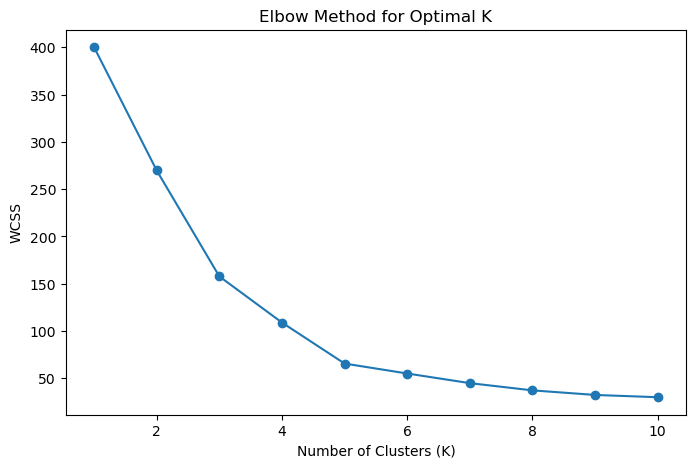

In [6]:
# Problem 4: Using the Elbow Method to determine Optimal K

# Selecting Features for Clustering
X = cluster_norm[['Income', 'SpendingScore']].values

# Compute WCSS for different K values
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Sum of squared distances

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

C:\Users\bjone\anaconda3\envs\mlclass\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


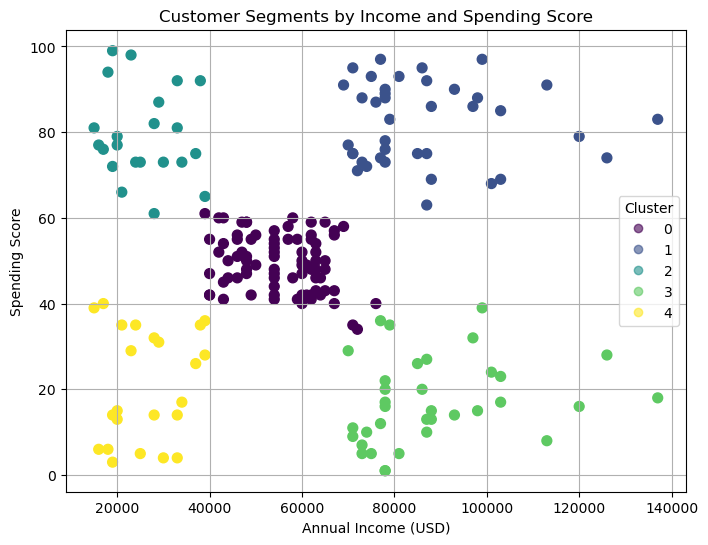

In [7]:
# Choosing k based on the Elbow Method above
k_optimal = 5  

# Final KMeans model fitting
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X)

# Visualizing the clusters on the original income/spending scale

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    cluster_df['Income'],
    cluster_df['SpendingScore'],
    c = cluster_labels,
    s = 50
)

plt.title('Customer Segments by Income and Spending Score')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Spending Score')
plt.grid(True)
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
plt.legend(handles, labels, title="Cluster")
plt.show()


In [8]:
# Problem 5: Evaluating and Naming Clusters

# Add cluster labels to 'cluster_df' 
cluster_df['Cluster'] = cluster_labels

# Summary stats for Income and SpendingScore by cluster
cluster_summary = cluster_df.groupby('Cluster').agg({
    'Income': ['mean', 'min', 'max'],
    'SpendingScore': ['mean', 'min', 'max']
})

print("Cluster summary (Income & SpendingScore):")
print(cluster_summary)


Cluster summary (Income & SpendingScore):
               Income                    SpendingScore        
                 mean      min       max          mean min max
Cluster                                                       
0        55296.296296  39000.0   76000.0     49.518519  34  61
1        86538.461538  69000.0  137000.0     82.128205  63  97
2        25727.272727  15000.0   39000.0     79.363636  61  99
3        88200.000000  70000.0  137000.0     17.114286   1  39
4        26304.347826  15000.0   39000.0     20.913043   3  40


Based off results above:

Cluster 0 would be Mid-Income / Mid-Spending Score
    
Cluster 1 would be High-Income / High-Spending Score

Cluster 2 would be Low-Income / High-Spending Score

Cluster 3 would be High-Income / Low-Spending Score

Cluster 4 would be Low-Income / Low-Spending Score

In [9]:
# Add cluster labels to original df
df['Cluster'] = cluster_labels

# Creating dummy variables for Gender
gender_dummies = pd.get_dummies(df['Gender'])

# Attach dummy columns to original df
df = pd.concat([df, gender_dummies], axis=1)

# Verifying that dummies are 'Male' and 'Female'
print(gender_dummies.head())

# Preview new Dataframe
df.head()

   Female   Male
0   False   True
1   False   True
2    True  False
3    True  False
4    True  False


,CustomerID,Gender,Age,Income,SpendingScore,Cluster,Female,Male
0,1,Male,19,15000.0,39,4,False,True
1,2,Male,21,15000.0,81,2,False,True
2,3,Female,20,16000.0,6,4,True,False
3,4,Female,23,16000.0,77,2,True,False
4,5,Female,31,17000.0,40,4,True,False


In [10]:
# Gender distribution per cluster (as percentages)
gender_cluster = df.groupby('Cluster')[['Male', 'Female']].mean() * 100

print("Gender distribution by cluster (%):")
print(gender_cluster.round(2))


Gender distribution by cluster (%):
          Male  Female
Cluster               
0        40.74   59.26
1        46.15   53.85
2        40.91   59.09
3        54.29   45.71
4        39.13   60.87


Based on the results above:

Cluster 0 is predominantly women customers

Cluster 1 is predominantly women customers

Cluster 2 is predominantly women customers

Cluster 3 is predominantly men customers

Cluster 4 is predominantly women customers 

In [11]:
# Mean age per cluster
age_cluster = df.groupby('Cluster')['Age'].mean()

print("Mean age by cluster:")
print(age_cluster.round(2))


Mean age by cluster:
Cluster
0    42.72
1    32.69
2    25.27
3    41.11
4    45.22
Name: Age, dtype: float64


Based on the results above and previous results:

Cluster 0 are early 40yrs old women customers with middle range incomes and middle range spending scores

Cluster 1 are early 30yrs old women with high incomes and high spending scores

Cluster 2 are mid 20yrs old women with low incomes and high spending scores

Cluster 3 are early 40yrs old men with high incomes and low spending scores

Cluster 4 are mid 40yrs old women with low incomes and low spending scores